# Сборный проект: Линейные модели в машинном обучении

В данном проекте нам предстоит обучить несколько моделей, для того чтобы помочь фермеру предсказать удой коров по их характеристикам, а так же предсказать вкус молока для датасета с коровами, выставленными на продажу. У заказчика есть определенные требования, которым должна соответствовать покупаемая корова, а мы поможем подобрать таких коров.<br/><br/>
**Суть исследования:** на основе имеющегося датафрейма с коровами на ферме, в котором есть полные данные по каждой корове, научиться предсказывать Удой и вкус молока, чтобы в дальнейшем предсказать эти показатели у тех коров, о которых мы имеем не так много информации.<br/><br/>
**Задачи исследования:** обучить модели линейной регрессии и логистической регрессии, проверить качество их работы с помощью специальных метрик, и постараться усовершенствовать их на сколько возможно, добавляя или изменяя входные данные, либо же подбирая и меняя порог в логистических моделях. <br/><br/>
**Исходные данные:** на входе имеем 3 датафрема:
* датафрейм с данными о коровах на нашей ферме - ferma_main
* датафрейм с информацией об именах отцов каждой коровы на ферме - ferma_dad
* датафрейм, содержащий информацию о коровах которые доступны на продажу - cow_buy

**Данное исследование будет идти по такому плану:**<br/>
* предобработка данных
* исследовательский анализ данных
* корреляционный анализ всех признаков
* обучение модели линейной регрессии
* обучение модели логистической регрессии
* общие выводы из работы и рекомендации

In [1]:
!pip install scikit-learn -q

In [2]:
!pip install --upgrade scikit-learn -q
!pip install phik -q

In [3]:
#импорты
import pandas as pd
import warnings
warnings.simplefilter("ignore") 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import phik

In [4]:
import sklearn

In [5]:
print(sklearn.__version__)

1.4.2


## Загрузка данных

In [6]:
#создадим 3 датасета и загрузим в них исходные датафремы
df_ferma_m = pd.read_csv('/datasets/ferma_main.csv', sep=';')
df_ferma_d = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
df_cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

#выведем несколько строк и посмотрим какие данные в них содержатся, а также выведем информацию о датафрейме
display(df_ferma_m.head(6))
print(df_ferma_m.info())
print()
display(df_ferma_d.head(6))
print(df_ferma_d.info())
print()
display(df_cow_buy.head(6))
print(df_cow_buy.info())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None



,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None


Мы посмотрели по несколько строчек из каждого датафрейма, вывели и изучили общую информацию по каждому из них. Исходя из этого можно подметить следующие недочеты: 
* названия столбцов не соответствуют стандартам оформления
* в некоторых столбцах неверный тип данных, числа записаны как object
* столбцы с булевыми значениями записаны как строки
Но, в датафреймах не было обнаружено пропущеных значений, что облегчает нам дальнейшую работу с данными. <br/>
Также в дальнейшем сделаем проверку на дубликаты.

## Шаг. Предобработка данных
### Преобразование названий столбцов

In [7]:
#выведем список всех названий датафрейма фермы чтобы удобнее их переименовывать
df_ferma_m.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [8]:
df_ferma_m = df_ferma_m.rename(columns={'id' : 'id', 'Удой, кг' : 'volume', 'ЭКЕ (Энергетическая кормовая единица)' : 'eke',
       'Сырой протеин, г' : 'c_protein', 'СПО (Сахаро-протеиновое соотношение)' : 'spo', 'Порода' : 'breed',
       'Тип пастбища' : 'pasture', 'порода папы_быка' : 'dad_breed', 'Жирность,%' : 'fat', 'Белок,%' : 'protein',
       'Вкус молока' : 'taste', 'Возраст' : 'age'})

In [9]:
df_ferma_d.columns

Index(['id', 'Имя Папы'], dtype='object')

In [10]:
df_ferma_d = df_ferma_d.rename(columns={'id' : 'id', 'Имя Папы' : 'dad_name'})

In [11]:
df_cow_buy.columns

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')

In [12]:
df_cow_buy = df_cow_buy.rename(columns={'Порода' : 'breed', 'Тип пастбища' : 'pasture', 'порода папы_быка' : 'dad_breed',
                                        'Имя_папы' : 'dad_name','Текущая_жирность,%' : 'cur_fat',
                                        'Текущий_уровень_белок,%' : 'cur_protein','Возраст' : 'age'})

In [13]:
#проверим как теперь выглядят названия колонок
print(df_ferma_m.columns)
print(df_ferma_d.columns)
print(df_cow_buy.columns)

Index(['id', 'volume', 'eke', 'c_protein', 'spo', 'breed', 'pasture',
       'dad_breed', 'fat', 'protein', 'taste', 'age'],
      dtype='object')
Index(['id', 'dad_name'], dtype='object')
Index(['breed', 'pasture', 'dad_breed', 'dad_name', 'cur_fat', 'cur_protein',
       'age'],
      dtype='object')


Теперь все красиво, а также будет удобно с ними работать

### Изменение типов данных
Осмотрев данные было решено изменить их тип в некоторых столбцах, так как он некорректно отражает их содержимое. Все числа с плавающей точкой - float, все целые числа - int, бинарные показатели - заменим на 1 и 0.

In [14]:
#замены в столбцах датафрейма фермы
df_ferma_m['eke'] = df_ferma_m['eke'].str.replace(',', '.').astype('float64')
df_ferma_m['spo'] = df_ferma_m['spo'].str.replace(',', '.').astype('float64')
df_ferma_m['fat'] = df_ferma_m['fat'].str.replace(',', '.').astype('float64')
df_ferma_m['protein'] = df_ferma_m['protein'].str.replace(',', '.').astype('float64')

#замены в столбцах нового датафрейма 
df_cow_buy['cur_fat'] = df_cow_buy['cur_fat'].str.replace(',', '.').astype('float64')
df_cow_buy['cur_protein'] = df_cow_buy['cur_protein'].str.replace(',', '.').astype('float64')


In [15]:
#теперь обработаем столбцы с бинарными значениями
df_ferma_m['taste'] = df_ferma_m['taste'].map(lambda x: 1 if x == 'вкусно' else 0).astype('int64')

#проверим какие уникальные значения встречаются в столбце taste
unique_values = df_ferma_m['taste'].unique()
print(unique_values)

[1 0]


In [16]:
#также обработаем столбцы с бинарными значениями
df_ferma_m['age'] = df_ferma_m['age'].map(lambda x: 1 if x == 'более_2_лет' else 0).astype('int64')
df_cow_buy['age'] = df_cow_buy['age'].map(lambda x: 1 if x == 'более_2_лет' else 0).astype('int64')

#убедимся в том, чтобы все сработало
unique_values = df_ferma_m['age'].unique()
print(unique_values)
unique_values = df_cow_buy['age'].unique()
print(unique_values)

[1 0]
[1 0]


### Проверка наличия явных дубликатов

In [17]:
print(df_ferma_m.duplicated().sum())
print(df_ferma_d.duplicated().sum())
df_cow_buy.duplicated().sum()

5
0


4

In [18]:
#удалим дубликаты и заменим индексы
df_ferma_m = df_ferma_m.drop_duplicates().reset_index(drop = True)

### Проверка наличия неявных дубликатов
Для избежания неточностей в названиях хочется проверить списки уникальных значений, в столбцах с типами object

In [19]:
print('Информация по датафрейму основной фермы\n')
unique_values = df_ferma_m['breed'].unique()
print(unique_values)
unique_values = df_ferma_m['pasture'].unique()
print(unique_values)
unique_values = df_ferma_m['dad_breed'].unique()
print(unique_values)
print()
print('Информация по родительскому датафрейму\n')
unique_values = df_ferma_d['dad_name'].unique()
print(unique_values)
print()
print('Информация по датафрейму с возможной покупкой \n')
unique_values = df_cow_buy['breed'].unique()
print(unique_values)
unique_values = df_cow_buy['pasture'].unique()
print(unique_values)
unique_values = df_cow_buy['dad_breed'].unique()
print(unique_values)
unique_values = df_cow_buy['dad_name'].unique()
print(unique_values)

Информация по датафрейму основной фермы

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']

Информация по родительскому датафрейму

['Буйный' 'Соловчик' 'Барин' 'Геркулес']

Информация по датафрейму с возможной покупкой 

['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']


Мы не зря искали ошибки в названиях, потму что они встречаются в 2 из 3 датафреймов. Надо будет заменить опечатки в названиях типа местности, а так же привести их к одному виду(с заглавной буквы), и переиминовать название породы, в которой встретилась опечатка.

In [20]:
df_ferma_m.loc[df_ferma_m['pasture'] == 'Равнинные','pasture'] = 'Равнинное'
df_ferma_m.loc[df_ferma_m['dad_breed'] == 'Айдиалл','dad_breed'] = 'Айдиал'

df_cow_buy.loc[df_cow_buy['pasture'] == 'равнинное','pasture'] = 'Равнинное'
df_cow_buy.loc[df_cow_buy['pasture'] == 'холмистое','pasture'] = 'Холмистое'

In [21]:
#После преобразований в названиях проверим еще раз наличие явных дубликатов, чтобы исключить их окончательно
print(df_ferma_m.duplicated().sum())
print(df_ferma_d.duplicated().sum())
df_cow_buy.duplicated().sum()

0
0


4

Удостоверимся что после всех манипуляций датафреймы выглядят именно так, как должны. Выведем и изучем о них информацию еще раз.

In [22]:
display(df_ferma_m.head(6))
print(df_ferma_m.info())
print()
display(df_ferma_d.head(6))
print(df_ferma_d.info())
print()
display(df_cow_buy.head(6))
print(df_cow_buy.info())

,id,volume,eke,c_protein,spo,breed,pasture,dad_breed,fat,protein,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,1
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,0
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,1
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,1
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,0
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         629 non-null    int64  
 1   volume     629 non-null    int64  
 2   eke        629 non-null    float64
 3   c_protein  629 non-null    int64  
 4   spo        629 non-null    float64
 5   breed      629 non-null    object 
 6   pasture    629 non-null    object 
 7   dad_breed  629 non-null    object 
 8   fat        629 non-null    float64
 9   protein    629 non-null    float64
 10  taste      629 non-null    int64  
 11  age        629 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 59.1+ KB
None



,id,dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None



,breed,pasture,dad_breed,dad_name,cur_fat,cur_protein,age
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,1
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   breed        20 non-null     object 
 1   pasture      20 non-null     object 
 2   dad_breed    20 non-null     object 
 3   dad_name     20 non-null     object 
 4   cur_fat      20 non-null     float64
 5   cur_protein  20 non-null     float64
 6   age          20 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ KB
None


Теперь данные в порядке, названия столбцов соответствуют стандартам названий в python, типы данных соответствуют явным, теперь с ними будет удобно работать и проводить расчеты. Также были устранены опечатки и несхождения в колонках с текстовыми данными, они все приведены к одному виду. Пропусков в данных не было. <br/>
Можем подметить, что в датафрейме по ферме и в датафрейме по информации о родителях одинаковое количество строк. Следовательно, скорее всего в дальнейшем мы их просто объединим в один.

## Исследовательский анализ данных

### Проведем статистический анализ данных всех признаков для каждого датасета <br/>
#### Начнем с датасета df_ferma_m

In [23]:
# выведем статистику по всем численным столбцам(без бинарных)
df_ferma_m.loc[:, ['volume', 'eke', 'c_protein', 'spo', 'fat', 'protein']].describe()

,volume,eke,c_protein,spo,fat,protein
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Проанализируем сразу полученные в этом пункте значения. Мы получили таблицу, которая содержит в себе статистические значения по всем численным столбцам. <br/>
* Среднее значение Удоя коровы составляет 6188 кг, минимальное - 5204 кг, а максимальное 45616 кг, что сразу вызывает подозрения, так как 3 квартиль находится на значении 6500, что значит, что скорее всего данные которые заметно больше этого значения будут считаться выбросами. Далее на графиках мы подробнее исследуем данную аномалию. <br/>
* В столбце ЭКЕ все выглядит однородно, нормально. Средний показатель составляет 14.5 единиц <br/>
* В столбце Сырой протеин среднее - 1923 г, минимум и максимум 1660 и 2349 соответственно. На первый взгляд данные без особых выбросов, на графиках будет явнее. <br/>
* В столбце СПО все выглядит однородно
* Жирность и белок так же без выбросов.

#### Выведем статистику по бинарным столбцам. Посчитаем процент единиц от общего количества записей

In [24]:
#для облегчения дальнейшей работы напишем функцию которая будет считать процент единичек в бинарном столбце

def calculate_percentage_ones(binary_column):
    
    # Подсчет количества единиц в столбце
    count_ones = binary_column.sum()
    
    # Подсчет общего количества значений в столбце
    total_count = len(binary_column)
    
    # Рассчитываем процент единиц
    percentage_ones = (count_ones / total_count) * 100
    
    # Возвращаем процент единиц
    return percentage_ones

# Пример использования:
# предположим, что df - ваш датафрейм, а 'binary_column' - бинарный столбец

percentage = calculate_percentage_ones(df_ferma_m['taste'])
print(f"Процент показателя \"Вкусно\" в столбце вкуса молока: {percentage:.2f}%")
percentage = calculate_percentage_ones(df_ferma_m['age'])
print(f"Процент показателя \"Более 2 лет\" в столбце возраста коров: {percentage:.2f}%")

Процент показателя "Вкусно" в столбце вкуса молока: 58.98%
Процент показателя "Более 2 лет" в столбце возраста коров: 82.51%


#### Для столбцов с типом данных object выведем количество по каждому из уникальных значений

In [25]:
print("Количество коров каждой породы:")
df_ferma_m['breed'].value_counts()

Количество коров каждой породы:


Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: breed, dtype: int64

In [26]:
print("Количество пастбищ каждого типа:")
df_ferma_m['pasture'].value_counts()

Количество пастбищ каждого типа:


Холмистое    351
Равнинное    278
Name: pasture, dtype: int64

In [27]:
print("Количество коров по типу породы папы_быка:")
df_ferma_m['dad_breed'].value_counts()

Количество коров по типу породы папы_быка:


Айдиал     318
Соверин    311
Name: dad_breed, dtype: int64

#### Мы вывели статистику по всем столбцам первого датафрейма, учтя особенности каждого типа данных, которые они содержат. Теперь мы можем сделать выводы о датафрейме с данными о нашей ферме. 
В столбцах с бинарными значениями результаты такие, что около 60% коров имеют вкусное молоко, и чуть более 80% коров больше 2 лет. <br/>
По столбцам с породами коров, их отцов и типом пастбища показатели распределены примерно одинакого. Нет такого, что большая часть принадлежит какому то одному из типов породы или пастбища.


#### Далее исследуем датасет df_ferma_d
Тут только один столбец - содержащий имя папы каждой коровы из датафрейма df_ferma_m, поэтому мы просто выведем количество "детей" у каждого из быков

In [28]:
print("Количество потомства у каждого быка:")
df_ferma_d['dad_name'].value_counts()

Количество потомства у каждого быка:


Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: dad_name, dtype: int64

Наглядно видно, что у нас всего 4 быка, больше всего потомства у Барина - 240 голов, а меньше всего у Геркулеса - всего 64.

#### Далее исследуем датасет df_cow_buy

In [29]:
#выведем информацию по столбцам с типами object
print("Количество коров каждой породы:")
df_cow_buy['breed'].value_counts()

Количество коров каждой породы:


РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: breed, dtype: int64

In [30]:
print("Количество пастбищ каждого типа:")
df_cow_buy['pasture'].value_counts()

Количество пастбищ каждого типа:


Равнинное    11
Холмистое     9
Name: pasture, dtype: int64

In [31]:
print("Количество коров по типу породы папы_быка:")
df_cow_buy['dad_breed'].value_counts()

Количество коров по типу породы папы_быка:


Соверин    12
Айдиал      8
Name: dad_breed, dtype: int64

In [32]:
print("Количество потомства у каждого быка:")
df_cow_buy['dad_name'].value_counts()

Количество потомства у каждого быка:


Буйный      8
Геркулес    6
Барин       4
Соловчик    2
Name: dad_name, dtype: int64

In [33]:
#выведем процент по столбцу с возрастом
percentage = calculate_percentage_ones(df_cow_buy['age'])
print(f"Процент показателя \"Более 2 лет\" в столбце возраста коров: {percentage:.2f}%")

Процент показателя "Более 2 лет" в столбце возраста коров: 75.00%


In [34]:
df_cow_buy.loc[:, ['cur_fat', 'cur_protein']].describe()

,cur_fat,cur_protein
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


#### Мы вывели статистику по всем данным и теперь можно сделать выводы.<br/>
* Датафрейм содержит всего 16 строк. <br/>
* Данные, которые описывают породы, отцов и пастбища так же равномерно распределены как и в основном датафрейме. Особых отличительных характеристик нет. Единственное различие - имя папы "Барин" теперь не на 1 месте, а на последнем.<br/>
* По возрасту чуть меньше 70% коров -  старше 2 лет. <br/>
* Процент белка и жирности в молоке корректно отображен, без выбросов. Средняя жирность - 3.57, в то время как в основном датафрейме - 3.6, а уровень белка 3.06, при показателе в основном датафрейме - 3.07. 

#### Теперь выведем графики для всех признаков

Гистаграммы для всех числовых переменных:



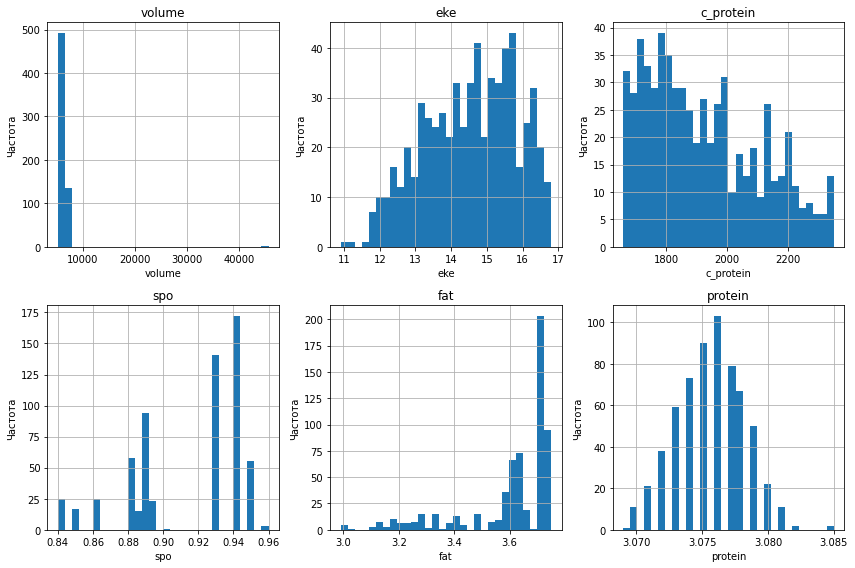

In [35]:
#выведем гистограмму снова
print('Гистаграммы для всех числовых переменных:\n')

# Найдем числовые столбцы в датафрейме
numerical_columns = ['volume', 'eke', 'c_protein', 'spo', 'fat', 'protein']

# Зададим размер фигуры для удобства визуализации
plt.figure(figsize=(12, 8))

# Цикл для итерации по каждому числовому столбцу
for i, column in enumerate(numerical_columns):
    # Создаем subplot для текущего столбца
    plt.subplot(2, 3, i + 1)  # 2 строки, 3 столбца, текущий график
    
    # Строим гистограмму для текущего столбца
    df_ferma_m[column].hist(bins=30)
    
    # Добавляем заголовок с названием столбца
    plt.title(column)
    
    # Добавляем метки для осей
    plt.xlabel(column)
    plt.ylabel('Частота')

# Отображаем все гистограммы
plt.tight_layout()
plt.show()

Теперь явно видно проблему с тем выбросом со значением 45000. Выведем 5 самых больших встречающихся значений

In [36]:
df_ferma_m.sort_values(by = 'volume').tail(5)

,id,volume,eke,c_protein,spo,breed,pasture,dad_breed,fat,protein,taste,age
294,295,7197,15.6,2241,0.94,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.075,1,1
296,297,7201,15.8,2077,0.94,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.072,1,1
135,136,7207,16.6,2343,0.94,Вис Бик Айдиал,Холмистое,Айдиал,3.72,3.078,1,1
70,71,7222,16.8,2157,0.95,Вис Бик Айдиал,Холмистое,Айдиал,3.70,3.076,1,1
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,1,1


Видно, что аномальное значение у нас одно. Это корова с номером айди 17. Предлагаю удалить эту строку из датафрейма

In [37]:
df_ferma_m = df_ferma_m.drop(df_ferma_m.loc[df_ferma_m['id'] == 17].index).reset_index(drop=True)

Гистаграммы для всех числовых переменных:



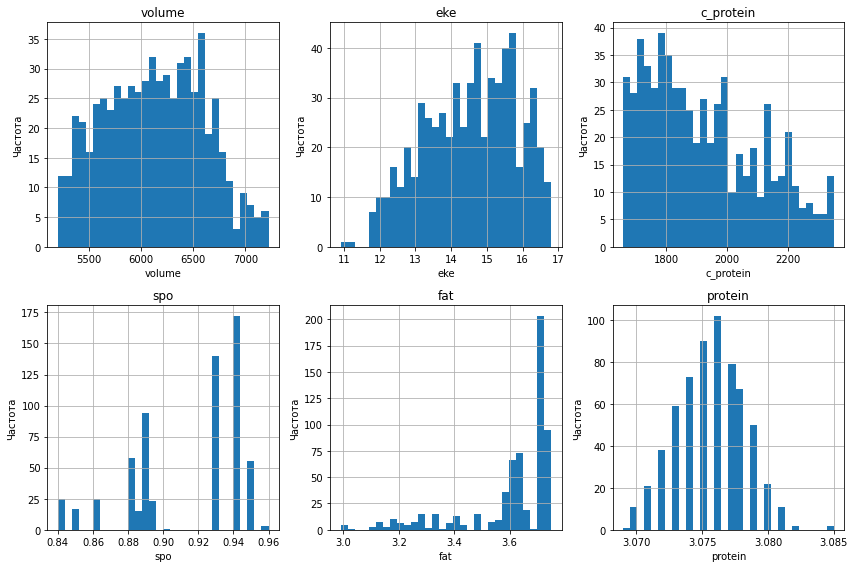

In [38]:
#выведем гистограммы снова
print('Гистаграммы для всех числовых переменных:\n')

# Найдем числовые столбцы в датафрейме
numerical_columns = ['volume', 'eke', 'c_protein', 'spo', 'fat', 'protein']

# Зададим размер фигуры для удобства визуализации
plt.figure(figsize=(12, 8))

# Цикл для итерации по каждому числовому столбцу
for i, column in enumerate(numerical_columns):
    # Создаем subplot для текущего столбца
    plt.subplot(2, 3, i + 1)  # 2 строки, 3 столбца, текущий график
    
    # Строим гистограмму для текущего столбца
    df_ferma_m[column].hist(bins=30)
    
    # Добавляем заголовок с названием столбца
    plt.title(column)
    
    # Добавляем метки для осей
    plt.xlabel(column)
    plt.ylabel('Частота')

# Отображаем все гистограммы
plt.tight_layout()
plt.show()

Можно заметить еще несколько небольших выбросов в некоторых показателях, но из-за маленького разброса значений не думаю что они являются прям явными выбросами, которые стоит удалить. Для большей наглядности можем вывести ящики с усами для всех тех же показателей.

Боксплоты для всех числовых переменных:



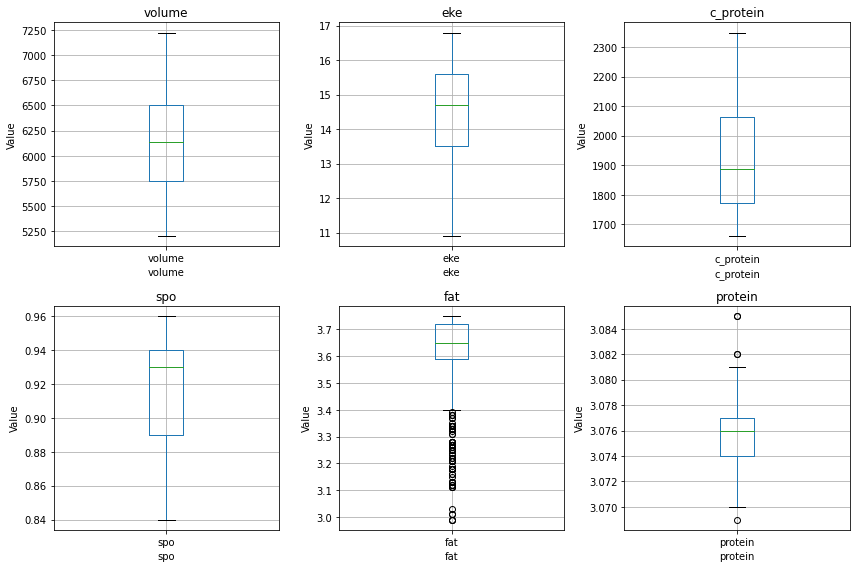

In [39]:
print('Боксплоты для всех числовых переменных:\n')
columns_to_plot = ['volume', 'eke', 'c_protein', 'spo', 'fat', 'protein']
plt.figure(figsize=(12, 8))

# Цикл для итерации по каждой количественной переменной
for i, column in enumerate(columns_to_plot):
    # Создаем subplot для текущего столбца
    plt.subplot(2, 3, i + 1)  # 2 строки, 3 столбца, текущий график
    
    # Строим график размаха для текущего столбца
    df_ferma_m.boxplot(column=column, ax=plt.gca())
    
    # Добавляем заголовок с названием столбца
    plt.title(column)
    
    # Добавляем метки для осей
    plt.xlabel(column)
    plt.ylabel('Value')

# Отображаем все графики размаха
plt.tight_layout()
plt.show()

А вот тут уже более заметно, что выбросы присутствуют в 2 столбцах: содержании жирности и белков. Думаю, их можно рассмотреть поближе и удалить.

In [40]:
#выбросов слишком много, относительно общего количества записей. Поэтому решено удалить только те строки, где жирность меньше 3.1
df_ferma_m.loc[df_ferma_m['fat'] < 3.1]

,id,volume,eke,c_protein,spo,breed,pasture,dad_breed,fat,protein,taste,age
16,18,5777,12.4,1873,0.895,Вис Бик Айдиал,Холмистое,Айдиал,3.03,3.080,1,1
553,555,5686,14.7,1712,0.860,РефлешнСоверинг,Холмистое,Айдиал,3.01,3.074,1,1
557,559,5346,12.4,1837,0.860,РефлешнСоверинг,Холмистое,Соверин,3.01,3.078,0,0
560,562,5300,13.0,1785,0.860,Вис Бик Айдиал,Равнинное,Соверин,2.99,3.077,0,0
567,569,5989,13.2,1721,0.860,Вис Бик Айдиал,Холмистое,Соверин,2.99,3.076,1,0
575,577,5376,11.7,1825,0.860,РефлешнСоверинг,Равнинное,Соверин,2.99,3.076,0,0


Таких строк всего 6, поэтому это не сильно исказит дальнейший анализ

In [41]:
df_ferma_m = df_ferma_m.loc[df_ferma_m['fat'] > 3.1]

#посмотрим сколько выбросов в столбце с содержанием белка
df_ferma_m.loc[(df_ferma_m['protein'] < 3.070) | (df_ferma_m['protein'] > 3.081)]

,id,volume,eke,c_protein,spo,breed,pasture,dad_breed,fat,protein,taste,age
76,78,5871,14.7,1795,0.895,Вис Бик Айдиал,Равнинное,Айдиал,3.61,3.082,1,1
239,241,5568,13.4,1733,0.880,Вис Бик Айдиал,Равнинное,Соверин,3.63,3.069,0,0
425,427,6701,15.7,2068,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.72,3.082,1,1
470,472,5883,14.9,2159,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.62,3.085,1,1
516,518,5819,13.7,1968,0.840,Вис Бик Айдиал,Холмистое,Айдиал,3.15,3.085,1,1


Для всех оставшихся признаков можно вывести круговые диаграммы, которые будут наглядно отображать процентную долю каждого показателя категориальных переменных. К ним же отнесем и бинарные показатели.

Круговые диаграммы для всех категориальных переменных:



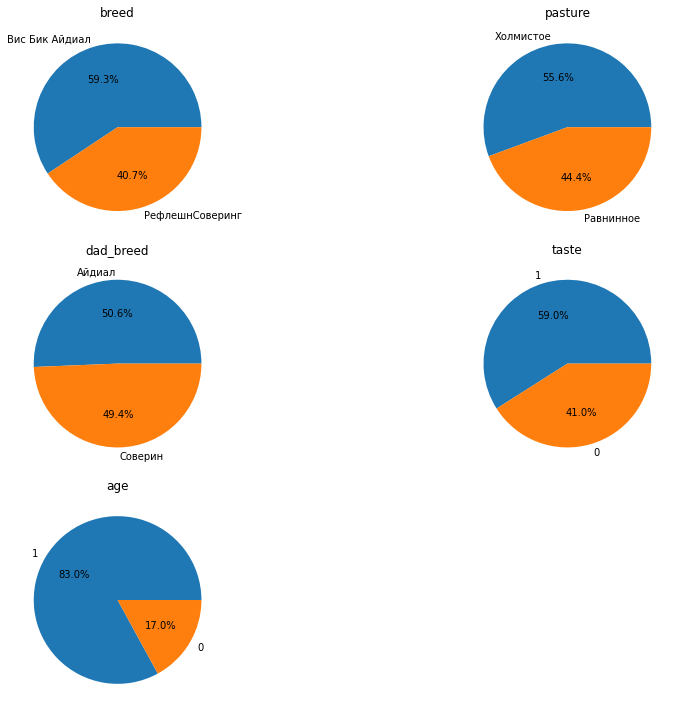

In [42]:
print('Круговые диаграммы для всех категориальных переменных:\n')
# Список столбцов, для которых нужно вывести круговые диаграммы
columns_to_plot = ['breed', 'pasture', 'dad_breed', 'taste', 'age']

# Зададим размер фигуры для удобства визуализации
plt.figure(figsize=(14, 10))

# Цикл для итерации по каждому столбцу
for i, column in enumerate(columns_to_plot):
    # Создаем subplot для текущего столбца
    plt.subplot(3, 2, i + 1)  # 3 строки, 2 столбца, текущий график
    
    # Подсчитываем количество каждого уникального значения в текущем столбце
    data = df_ferma_m[column].value_counts()
    
    # Строим круговую диаграмму для текущего столбца
    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    
    # Добавляем заголовок с названием столбца
    plt.title(column)

# Отображаем все круговые диаграммы
plt.tight_layout()
plt.show()

Теперь мы явно видим долю каждой характеристики по общему стаду. Все показатели почти поровну разделены, кроме бинарных - там явно видно, что в стаде больше коров которые дают вкусное молоко и которые старше 2 лет.

Гистаграммы для всех числовых переменных:



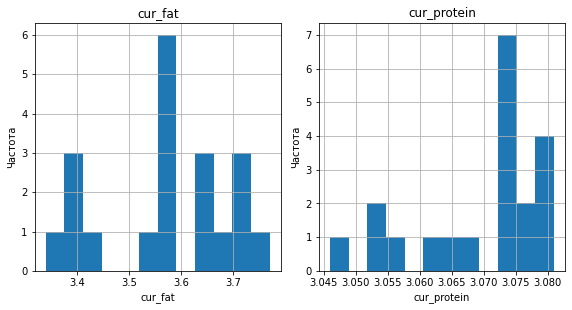

In [43]:
#сделаем все то же самое для датафрема df_cow_buy

#выведем гистограммы 
print('Гистаграммы для всех числовых переменных:\n')

# Найдем числовые столбцы в датафрейме
numerical_columns = ['cur_fat', 'cur_protein']

# Зададим размер фигуры для удобства визуализации
plt.figure(figsize=(12, 8))

# Цикл для итерации по каждому числовому столбцу
for i, column in enumerate(numerical_columns):
    # Создаем subplot для текущего столбца
    plt.subplot(2, 3, i + 1)  # 2 строки, 3 столбца, текущий график
    
    # Строим гистограмму для текущего столбца
    df_cow_buy[column].hist(bins=12)
    
    # Добавляем заголовок с названием столбца
    plt.title(column)
    
    # Добавляем метки для осей
    plt.xlabel(column)
    plt.ylabel('Частота')

# Отображаем все гистограммы
plt.tight_layout()
plt.show()

Круговые диаграммы для всех категориальных переменных:



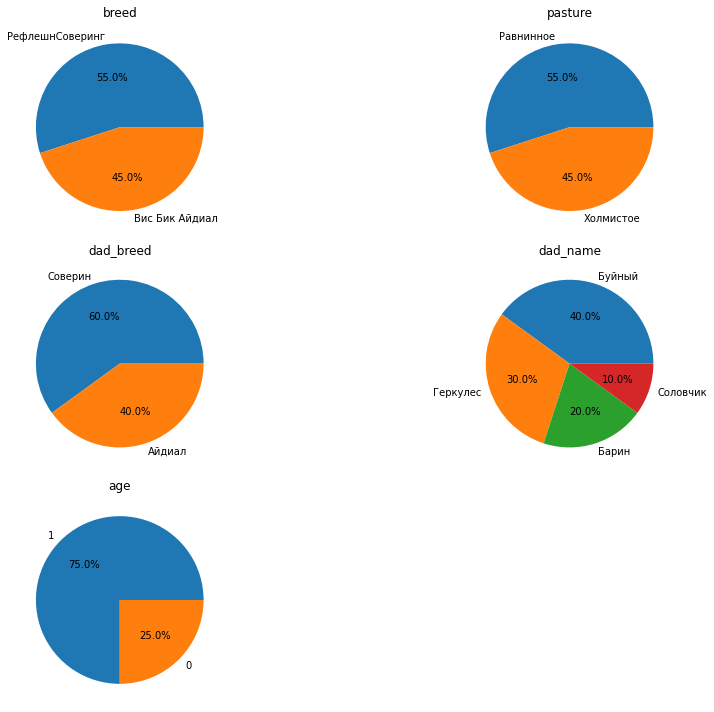

In [44]:
print('Круговые диаграммы для всех категориальных переменных:\n')
# Список столбцов, для которых нужно вывести круговые диаграммы
columns_to_plot = ['breed', 'pasture', 'dad_breed','dad_name','age']

# Зададим размер фигуры для удобства визуализации
plt.figure(figsize=(14, 10))

# Цикл для итерации по каждому столбцу
for i, column in enumerate(columns_to_plot):
    # Создаем subplot для текущего столбца
    plt.subplot(3, 2, i + 1)  # 3 строки, 2 столбца, текущий график
    
    # Подсчитываем количество каждого уникального значения в текущем столбце
    data = df_cow_buy[column].value_counts()
    
    # Строим круговую диаграмму для текущего столбца
    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    
    # Добавляем заголовок с названием столбца
    plt.title(column)

# Отображаем все круговые диаграммы
plt.tight_layout()
plt.show()

Видно, что тут уже не так равномерно распределены характеристики, но это потому что у нас всего 16 строк. 

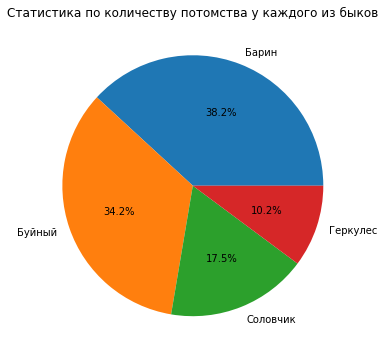

In [45]:
plt.figure(figsize=(6, 6))
# Подсчитываем количество каждого уникального значения в текущем столбце
data = df_ferma_d['dad_name'].value_counts()
    
    # Строим круговую диаграмму для текущего столбца
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Статистика по количеству потомства у каждого из быков')
plt.show()

Мы провели статистический анализ для всех признаков из 3 датафреймов, а так же вывели соответствующие графики, учитывая тип каждой из переменных. Было замечено немного выбросов, и самые критичные из них были удалены. Всего было удалено 12 строк из главного датафрейма, что не является критичным для дальнейшего исследования. <br/>
При анализе колличественных переменных были выведены гистограммы распределений этих значений. Было замечено, что:
* распределение показателя ЭКЕ стремится к нормальному, но имеется небольшой сдвиг вправо.
* распределение белка очень близко к нормальному распредлению
* распределение СПО и Жирности близки к распределению Пуассона
* сырой протеин тоже напоминает распределение Пуассона, но только в отличии от 2 предыдущих показателей частота встречаемости убывает при увеличении показателя.
* удой распределяется тоже довольно близко к нормальному
Чтобы улучшить данные можно полностью исключить все выбросы, которые мы могли заметить на диаграммах ящика с усами, но тогда это будет выброшен довольно значимый процент данных.

## Корреляционный анализ.
#### Проведем корреляционный анализ всех признаков в датасете df_ferma_m
#### Объединение двух датафреймов
Датафрейм с информацией о родителях содержит просто столбец, который может пригодиться в общем анализе признаков, влияющих на целефую переменную, поэтому решено объединить датафреймы df_ferma_d и df_ferma_m <br/>
В итоге мы получим новый датафрейм, содержащий всю информацию о нашей ферме <br/>

In [46]:
#обьединение будем производить по столбцу id, так как мы удаляли некоторые строки и у нас сдвинулась нумерация
df_ferma = pd.merge(df_ferma_m, df_ferma_d, on='id', how='left')
df_ferma.head()

,id,volume,eke,c_protein,spo,breed,pasture,dad_breed,fat,protein,taste,age,dad_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,1,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,0,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,1,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,1,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,0,Барин


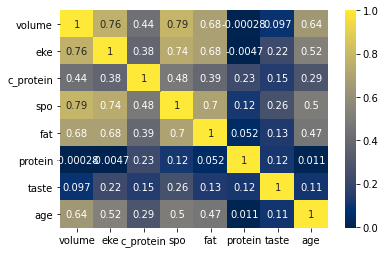

In [47]:
#теперь можем вывести матрицу корреляции для всех признаков 
#так как выше мы узнали, что не все признаки распределены нормально, будем использовать корреляцию методом Смирмана, вместо Пирсона
#а так же для анализа уберем из датафрейма id
df_ferma_corr = df_ferma.drop(columns=['id'])
sns.heatmap(df_ferma_corr.corr(method = 'spearman'), annot=True, cmap='cividis')
sns.set(rc={"figure.figsize":(10,10)})

Мы получили матрицу корреляции между всеми числовыми признаками в таблице. Можем сделать выводы. Нас интересует влияние на целевую переменную - volume, а так же наличие сильной корреляции между нецелевыми переменными:
* переменная volume сильнее всего коррелирует с переменными ЭКЕ и СПО - около 0.8 
* примерно так же между собой коррелируют оба этих показателя - 0.74, в дальнейшем если модель будет некорректно работать первым делом удалим один из этих признаков и проверим как она будет работать в таком случае


In [48]:
#чтобы убедиться в том, что не были упущены никакие важные признаки, которые тоже могут повлиять на целевую переменную
#выведем матрицу корреляции, посчитанную с помощью Фк корреляции

#для начала подгрузим библиотеку phik
!pip install phik -q

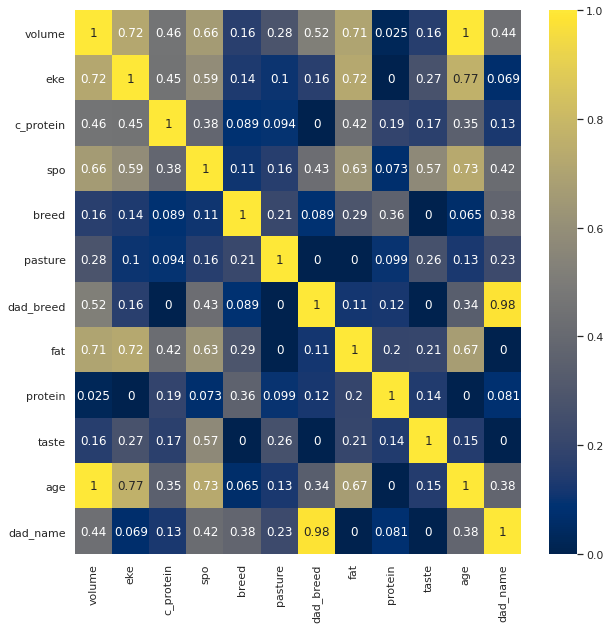

In [49]:
continuous_columns = ['volume', 'eke', 'c_protein', 'spo', 'fat', 'protein']
categorical_columns = [col for col in df_ferma_corr.columns if col not in continuous_columns]

phik_matrix = df_ferma_corr.phik_matrix(interval_cols=continuous_columns)
sns.heatmap(phik_matrix, annot=True, cmap='cividis')
sns.set(rc={"figure.figsize": (10, 10)})

Мы расчитали матрицу с помощью коэффициентов Фк для того, чтобы не упустить высокую корреляцию между целевым признаком, и каким-то категориальным признаком, так как обычная корреляция не расчитывается для категориальных признаков. <br/>
Учитывая эту матрицу и рассматривая только категориальные признаки, можно сделать выводы, что на Удой влияет жирность, спо, еке и возраст коровы.

#### Выведем диаграммы рассеяния зависимости между целевой переменной volume(Удой) и всеми количественными признаками.


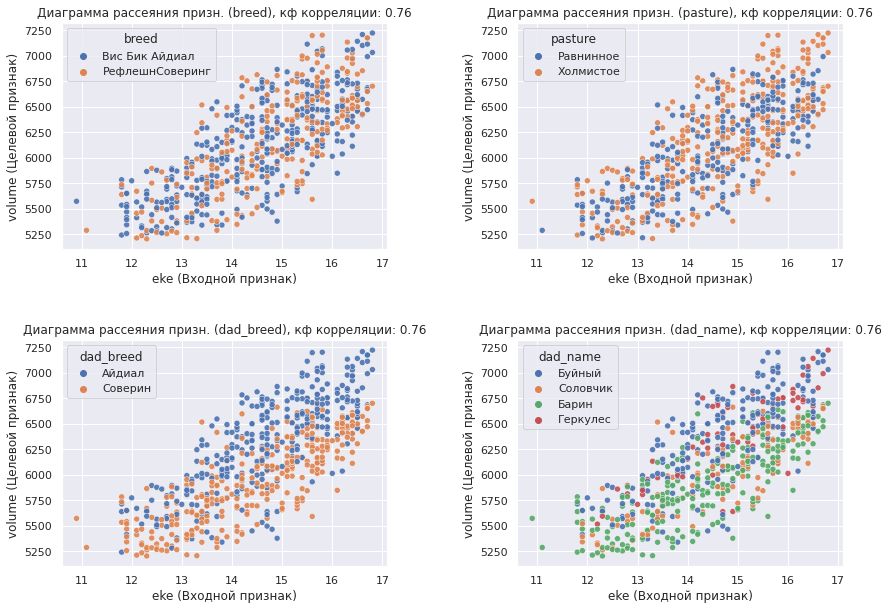

In [50]:
#для этого создадим функцию, которая будет строить графики зависимости между целевой переменной и входной, 
#учитывая разные типы в категориальных переменных
categories = ['breed', 'pasture', 'dad_breed', 'dad_name']

def scatter_plotting(x1, y1):
    # Создаем фигуру и массив осей для сетки подграфиков (2 строки и 2 столбца)
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Увеличиваем отступы между графиками для улучшения отображения
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    # Цикл для итерации по каждой категории
    for i, category in enumerate(categories):
        # Вычисляем коэффициент корреляции между x1 и y1
        k = df_ferma[[x1, y1]].corr(method='spearman')[y1][x1]
        
        # Строим диаграмму рассеяния с учетом категорий по переменной i
        sns.scatterplot(data=df_ferma, x=x1, y=y1, alpha=0.9, hue=df_ferma[category], ax=axes[i // 2, i % 2])
        
        # Устанавливаем метки осей и заголовок
        axes[i // 2, i % 2].set_xlabel(f'{x1} (Входной признак)', fontsize=12)
        axes[i // 2, i % 2].set_ylabel(f'{y1} (Целевой признак)', fontsize=12)
        axes[i // 2, i % 2].set_title(f'Диаграмма рассеяния призн. ({category}), кф корреляции: {k:.2f}', fontsize=12)
    
    # Отображаем сетку подграфиков
    plt.show()

# Пример использования функции
scatter_plotting('eke', 'volume')

Рассматривая графики зависимости Удоя от Эке, можно сделать вывод что между ними есть связь, которая выражается квадратичной функцией. Разные категории не сильно влияют на тип связи, поэтому можно сказать что такая связь везде.

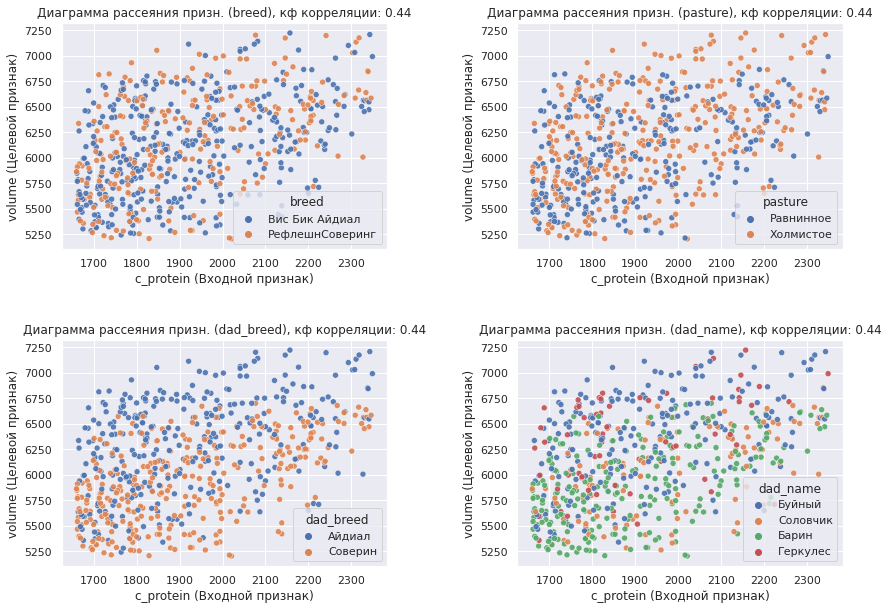

In [51]:
#выведем такие же графики для всех остальных входных признаков
scatter_plotting('c_protein', 'volume')

Тут же связь не так явна, но все же она есть. Коэффициент корреляции составляет 0.44. Он не маленький, но недостаточно большой чтобы говорить о серьезной зависимости. <br/>
Если подробнее изучить все графики и подкатегории, можно заметить, что из всех представленных признаков больше всего связи удоя и сырого протеина у коров, чья порода отца - Соверин. Там связь больше всех напоминает линейную.

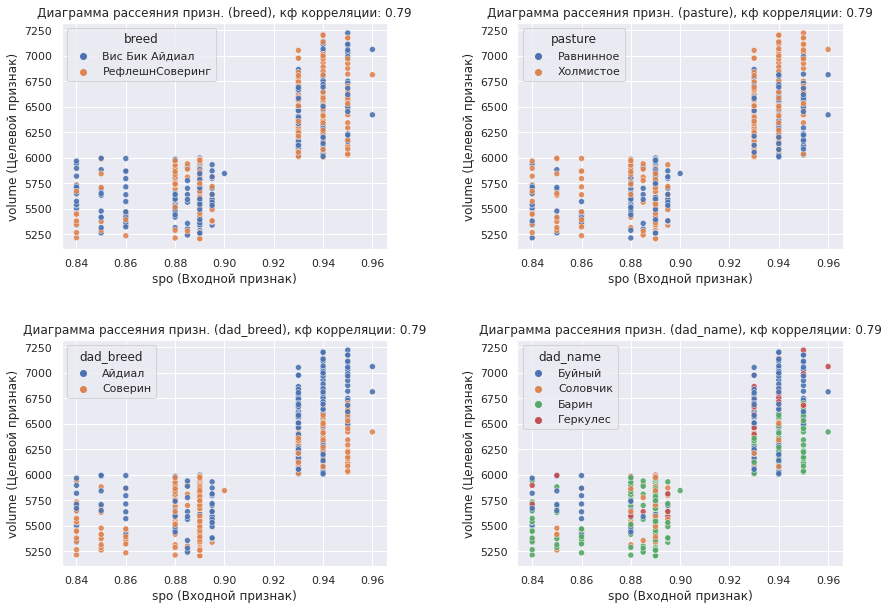

In [52]:
scatter_plotting('spo', 'volume')

В данном случае графики выглядят довольно своеобразно. Это связано с тем, что большинство значений принимают одно и то же значение. Коэффициент корреляции больше чем у всех остальных признаков - 0.79. Если провести черту, то можно снова заметить нелинейную зависимость, а минно квадратичную. Думаю именно так связаны эти переменные. <br/>
А вообще, для более удобного анализа лучше было бы перевести эту переменную в категориальную(ввести 3 категории 0.84-0.86, 0.88-0.9, 0.93-0.96)

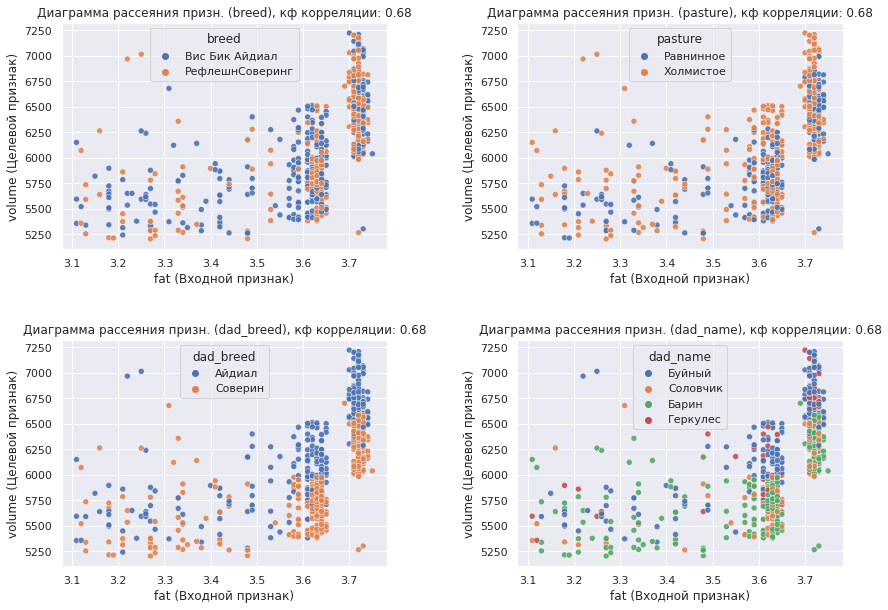

In [53]:
scatter_plotting('fat', 'volume')

Между удоем и процентом жирности тоже есть зависимость - кф. корреляции 0.68. Можно считать ее довольно сильной, для принятия во внимание. Зависимость есть, думаю это так же квадратичная зависимть явно по породе Айдиал(по Соверин менее выраженная). 

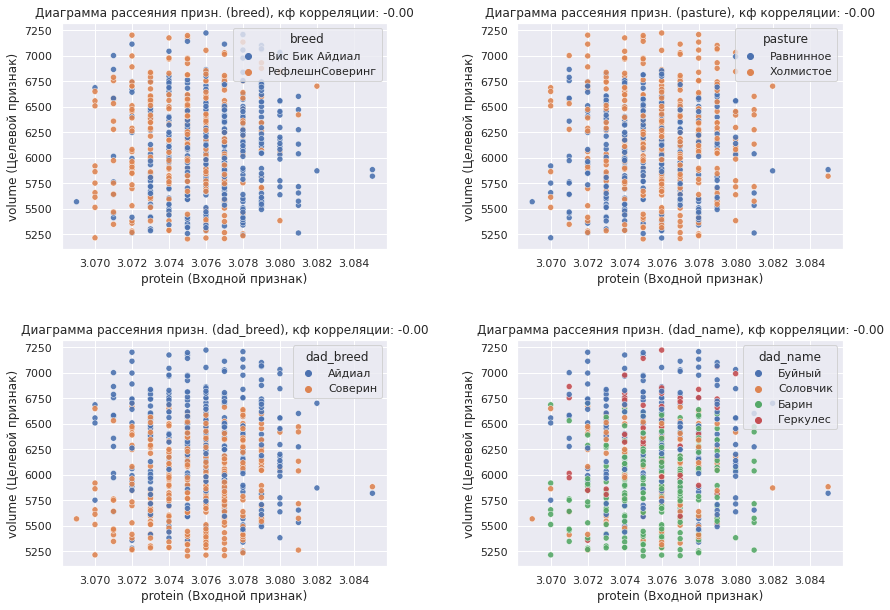

In [54]:
scatter_plotting('protein', 'volume')

Между удоем и процентом белка зависимости нет никакой. Она нулевая. Все значения праспределены равномерно по всему графику.

Так же мы изучили все входные признаки на мультиколлинеарность, и как говорилось ранее, между собой коррелируют ЭКЕ и СПО - 0.74, в дальнейшем, если модель будет некорректно работать первым делом удалим один из этих признаков и проверим как она будет работать в таком случае.

## Обучение модели линейной регрессии
#### Подготовка данных датасета ferma_main.csv и обучение на них первой модели LinearRegression
Начнем с отбора характеристик которые будем считать как вводные для обучения на них нашей модели<br/>
Изучив получившиеся матрицы корреляции можно прийти к выводу, что больше всего влияют на целевую переменную параметры СПО, ЭКЕ, возраст и жирность. Также, мне показалось что есть некая зависимость между породой отца и графиками Удоя, так что его тоже возьмем.<br/>
Целевой признак - volume

In [55]:
#выделим получившиеся входные признаки в отдельный датафрейм, а так же создадим датафрейм с целевым признаком.

#создание константы RANDOM_STATE
RANDOM_STATE = 42

#входные признаки
X = df_ferma[['age','dad_breed', 'eke']]
#целевой признак
y = df_ferma['volume']

#разделение на тренировочную и тестовые выборки
X_train, X_test, y_train, y_test1 = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

Теперь кодируем категориальные признаки при помощи One-Hot Encoder

In [56]:
cat_col_names = ['dad_breed', 'age']
num_col_names = ['eke']

#закодируем все категориальные переменные которые у нас встречаются (dad_breed и age)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop='first')
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# выполним преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получаем от кодировщика список новых столбцов 
encoder_col_names = encoder.get_feature_names_out()


# создаём тренировочный и тестовый датафреймы из закодированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

#выведем новую тренировочную закодированную выборку чтобы посмотреть как теперь выглядят столбцы dad_breed и age
X_train_ohe

,dad_breed_Соверин,age_1
0,1.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,1.0
4,0.0,1.0
...,...,...
461,0.0,0.0
462,0.0,1.0
463,1.0,1.0
464,0.0,1.0


5 строк, и мы их снова легко можем убрать, не сильно изменя исходный df

Далее отмасштабируем количественные признаки

In [57]:
scaler = StandardScaler()

# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#проверяем что мы получили в новом датафрейме
X_train.head()

,dad_breed_Соверин,age_1,eke
0,1.0,1.0,1.593111
1,0.0,1.0,1.439486
2,0.0,1.0,-0.327193
3,1.0,1.0,-0.250381
4,0.0,1.0,0.133680


Теперь нам предстоит обучить модель линейной регрессии на новых подготовленных данных

In [58]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

# предсказанные значения для X_test
predictions1 = model_lr.predict(X_test)

# вывод вторых предсказанного и настоящего значений для проверки что все корректно работает
print(predictions1[1], y_test1.reset_index().loc[1, 'volume'])

6067.536016117545 5814


Полученные значения на первый взгляд довольно близки. В любом случае, мы получили модель которая работает. А вот оценить точность прдсказания нам помогут метрики, которые мы будем использовать дальше. <br/>
Оценим качество работы модели: рассчитаем R^2 а после оценим остатки с помощью графиков

In [59]:
#рассчитаем коэффициент детерминации
r2 = r2_score(y_test1, predictions1)
print('R2 LinearRegression =', r2)

R2 LinearRegression = 0.7070787157951637


Метрика показала довольно неплохие результаты - 0.7. Это число довольно близко к 1, значит можно сделать вывод что модель предсказывает довольно точно. Не смотря на это, мы все равно не можем опираться только на 1 метрику, для того чтобы оценить ее объективность мы должны оценить остатки.<br/>
Остатки оцениваются при помощи двух графиков - гистаграммы, на которой мы смотрим распределение, и диаграмма рассеивания для оценки дисперсии. Распределение должно быть нормальным, а дисперсия постоянна при всех значениях.

In [60]:
#создадим новую переменную, в которой посчитаем значение между реальными значениями и предсказанными
errors = y_test1 - predictions1

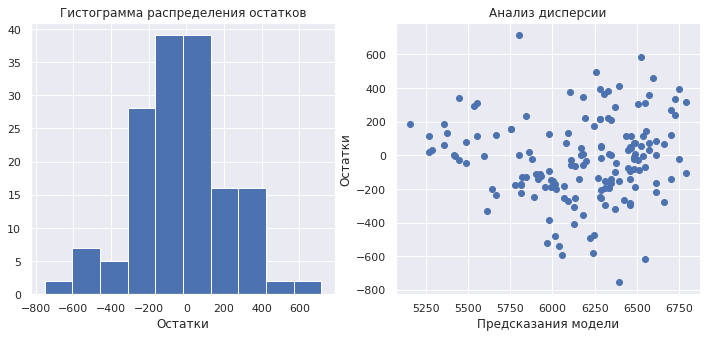

In [61]:
#теперь построим гистарграмму и диаграмму рассеивания для оценки дисперсии
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].hist(errors)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions1, errors)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Выводы:**
Метрика r2 дала относительно хороший результат - 0.79, а при анализе остатков мы получили нормальное распределение. Но вот при анализе дисперсии можно увидеть форму "Дуга", она говорит о том, что скорее всего какой-то из взятых признаков нелинейно связан с целевым. Такую модель в работе использовать нельзя, требуется изучение всех признаков еще раз и преобразование, для того чтобы добиться линейной зависимости.

#### Подготовка данных и обучение второй модели Линейной регрессии
Мы обнаружили 2 признака, которые нелинейно связаны с целевым - ЭКЕ и СПО. <br/>
На графике СПО явно видно, что его будет легче анализировать, преобразовав количественные значения в категироальные, разлелив их на 2 группы по интервалам. <br/>
ЭКЕ имеет квадратичную зависимость(график в виде параболы), и добиться линейности мы можем возведя значения в квадрат<br/><br/>
Начнем с СПО. На графике видно, что есть 2 отчетливых кластера, и пограничным значением между этими кластерами будет 0.92. Надо ввести новую бинарную переменную "Больше 0.92" и "Меньше 0.92", которые будут 1 и 0 соответственоо. 

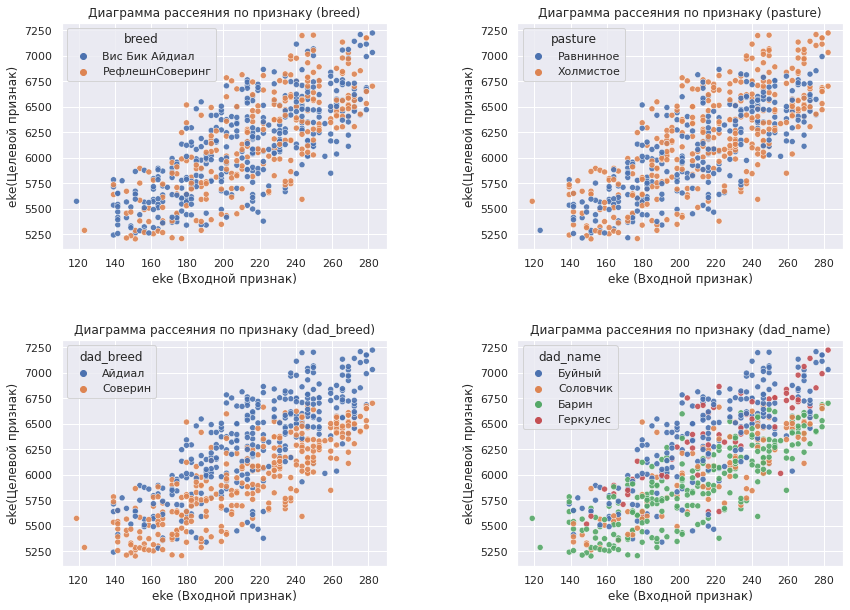

In [62]:
#приведем столбец со значениями SPO к бинарному типу
#X['spo'] = (X['spo'] > 0.92).astype(int)
#возведем значения столбца ЭКЕ в квадрат
X['eke'] = X['eke']**2

#выведем новые графики для ЭКЕ и СПО

# Создаем фигуру и массив осей для сетки подграфиков (2 строки и 2 столбца)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Увеличиваем отступы между графиками для улучшения отображения
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Цикл для итерации по каждой категории
for i, category in enumerate(categories):
    # Строим диаграмму рассеяния с учетом категорий по переменной i
    sns.scatterplot(data=X, x='eke', y=y, alpha=0.9, hue=df_ferma[category], ax=axes[i // 2, i % 2])

    # Устанавливаем метки осей и заголовок
    axes[i // 2, i % 2].set_xlabel('eke (Входной признак)', fontsize=12)
    axes[i // 2, i % 2].set_ylabel( 'eke(Целевой признак)', fontsize=12)
    axes[i // 2, i % 2].set_title(f'Диаграмма рассеяния по признаку ({category})', fontsize=12)

# Отображаем сетку подграфиков
plt.show()

Связь стала выглядеть заметно линейнее. Значит мы все сделали верно.

Сравнивая с прошлым графиком, теперь явно видно, что зависимость однозначна. <br/>
Обучим модель еще раз, учитывая новые преобразования.

In [63]:
#повторим все действия, которые делали при обучении первой модели

#входные признаки
X = df_ferma[['spo','age','fat','dad_breed', 'eke']]
#целевой признак
y = df_ferma['volume']

#приведем столбец со значениями SPO к бинарному типу
X['spo'] = (X['spo'] > 0.92).astype(int)
#возведем значения столбца ЭКЕ в квадрат
X['eke'] = X['eke']**2

#разделение на тренировочную и тестовые выборки
X_train, X_test, y_train, y_test2 = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)


cat_col_names = ['dad_breed', 'age']
num_col_names = ['spo', 'fat','eke']

#закодируем все категориальные переменные которые у нас встречаются (dad_breed и age)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop='first')

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# выполним преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получаем от кодировщика список новых столбцов 
encoder_col_names = encoder.get_feature_names_out()

# создаём тренировочный и тестовый датафреймы из закодированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

# предсказанные значения для X_test
predictions2 = model_lr.predict(X_test)

# вывод вторых предсказанного и настоящего значений для проверки что все корректно работает
print(predictions2[1], y_test2.reset_index().loc[1, 'volume'])

5830.834194085945 5814


На этом этапе можно уже заметить что мы получили новое предсказанное значение и оно ближе, чем в первой модели. Но это конечно ничего не значит, надо оценивать работу модели по метрикам.

In [64]:
#рассчитаем коэффициент детерминации
r2 = r2_score(y_test2, predictions2)
print('R2 LinearRegression =', r2)

R2 LinearRegression = 0.8158487561644485


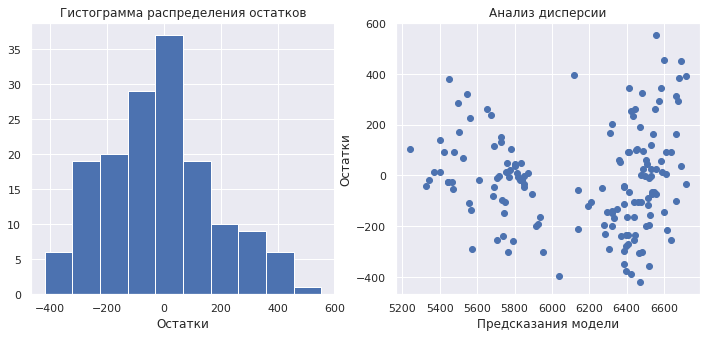

In [65]:
errors = y_test2 - predictions2
#теперь построим гистарграмму и диаграмму рассеивания для оценки дисперсии
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].hist(errors)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions2, errors)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Мы получили новые показатели метрики и новые графики остатков. Результаты такие, что r2 увеличился и стал равен 0.82, а вот графики остатков не сильно изменились. На гистограмме все так же нормальное распределение(которое как будто стало менее нормальным), а дисперсия осталась примерно такая же, неравномерная. Следовательно, модель все еще не идеальна.

#### Обучение третьей модели
Выше мы уже объединили основной датафрейм с датафреймом, который содержал имена пап. Теперь предлагаю использовать этот параметр при обучении модели и посмотреть как это повлияет на ее точность.

In [66]:
#повторим все действия, которые делали при обучении первой модели

#входные признаки
X = df_ferma[['spo','age','fat','dad_breed', 'eke', 'dad_name']]
#целевой признак
y = df_ferma['volume']

#приведем столбец со значениями SPO к бинарному типу
X['spo'] = (X['spo'] > 0.92).astype(int)
#возведем значения столбца ЭКЕ в квадрат
X['eke'] = X['eke']**2

#разделение на тренировочную и тестовые выборки
X_train, X_test, y_train, y_test3 = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)


cat_col_names = ['dad_breed', 'age', 'dad_name']
num_col_names = ['spo', 'fat','eke']

#закодируем все категориальные переменные которые у нас встречаются (dad_breed и age)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop='first')

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# выполним преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])
# получаем от кодировщика список новых столбцов 
encoder_col_names = encoder.get_feature_names_out()

# создаём тренировочный и тестовый датафреймы из закодированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

# предсказанные значения для X_test
predictions3 = model_lr.predict(X_test)

# вывод вторых предсказанного и настоящего значений для проверки что все корректно работает
print(predictions3[1], y_test3.reset_index().loc[1, 'volume'])

5832.637406060776 5814


In [67]:
#рассчитаем коэффициент детерминации
r2 = r2_score(y_test3, predictions3)
print('R2 LinearRegression =', r2)

R2 LinearRegression = 0.8371061563859638


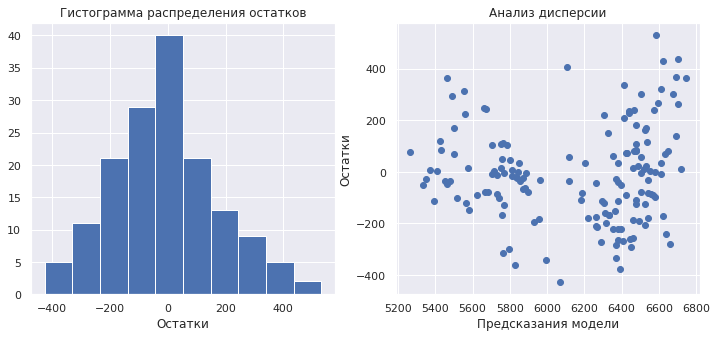

In [68]:
errors = y_test3 - predictions3
#теперь построим гистарграмму и диаграмму рассеивания для оценки дисперсии
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].hist(errors)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions3, errors)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Мы обучили третью модель, добавив признак имя папы. У нас улучшилась метрика r2 - значение достигло почти 0.84, гистаграмма распределения остатков приняла почти идеально нормальный вид. А вот анализ дисперсии, ну вроде как будто тоже стал лучше, хоть и выглядит примерно так же. <br/><br/>
Подведем итоги:
* R2 1 модели - 0.79
* R2 1 модели - 0.82
* R2 1 модели - 0.84
Если учитывать только метрику R2 и остатки, то явно выигрывает 3 модель. <br/> Но что же там с остальными метриками?

In [69]:
#расчитаем метрики MSE, MAE, RMS для всех 3 моделей
mse1 = mean_squared_error(y_test1, predictions1)
rmse1 = mean_squared_error(y_test1, predictions1, squared=False) 
mae1 = mean_absolute_error(y_test1, predictions1)

mse2 = mean_squared_error(y_test2, predictions2)
rmse2 = mean_squared_error(y_test2, predictions2, squared=False) 
mae2 = mean_absolute_error(y_test2, predictions2)

mse3 = mean_squared_error(y_test3, predictions3)
rmse3 = mean_squared_error(y_test3, predictions3, squared=False) 
mae3 = mean_absolute_error(y_test3, predictions3)

print('MSE, RMSE, MAE для 1 модели:', mse1,rmse1,mae1)
print('MSE, RMSE, MAE для 2 модели:', mse2,rmse2,mae2)
print('MSE, RMSE, MAE для 3 модели:', mse3,rmse3,mae3)

MSE, RMSE, MAE для 1 модели: 61176.311507355735 247.33845537513113 191.26778414722278
MSE, RMSE, MAE для 2 модели: 38459.79949163666 196.11170156733803 153.66702486429205
MSE, RMSE, MAE для 3 модели: 34020.21313205153 184.44569155188074 143.58643154120278


Мы рассчитали и вывели все 3 метрики для 3 моделей, и можем увидеть, что ниже всех показатели у 3 модели. Среднеквадратичная ошибка, ее квадрат и средняя абсолютная ошибка. Так как они ниже, это значит что 3 модель меньше ошибается чем 2 другие. Она показала лучшие результаты по всем 4 метрикам.
Вывод: третья модель лучше всего справится с предсказанием целевого признака.<br/><br/>


Определим доверительный интервал для целевого признака:

In [70]:
# Расчет квантилей ошибки модели 
quantiles = np.percentile(predictions1 - y_test1, [2.5, 97.5]) 
 
# Определение доверительного интервала прогноза 
confidence_interval = (predictions1.mean() + quantiles[0], predictions1.mean() + quantiles[1])
confidence_interval

(5753.269144342831, 6716.522582137231)

Мы рассчитали доверительный интервал, и получили значения от 5750.6 до 6532.7

#### Прогнозирование Удоя коров которые хочет купить фермер.
Предсказания будем строить на данных датасета df_cow_buy, но для начала добавим в датасет недостающие колонки: eke, c_protein, spo. Значения будем брать из датасета df_ferma, используя средние показатели по каждому параметру увеличенные на 5%.

In [71]:
mean_eke = df_ferma['eke'].mean()*1.05
mean_c_protein = df_ferma['c_protein'].mean()*1.05
mean_spo = df_ferma['spo'].mean()*1.05
#выведем их чтобы посмотреть
print(mean_eke,mean_c_protein,mean_spo)

15.292861736334403 2021.2803858520901 0.959222266881029


In [72]:
#теперь создадим новые столбцы в датафрейме df_cow_buy и запишем туда полученные значения
df_cow_buy['eke'] = mean_eke
df_cow_buy['mean_c_protein'] = mean_c_protein
df_cow_buy['mean_spo'] = mean_spo

#выведем новый датафрейм 
df_cow_buy.head()

,breed,pasture,dad_breed,dad_name,cur_fat,cur_protein,age,eke,mean_c_protein,mean_spo
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.292862,2021.280386,0.959222
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.292862,2021.280386,0.959222
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.292862,2021.280386,0.959222
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,1,15.292862,2021.280386,0.959222
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,1,15.292862,2021.280386,0.959222


Все получилось и мы имеем новые данные, на основе которых будем делать предсказания. Только для начала нужно их обработать.


In [73]:
cat_col_names = ['dad_breed', 'age','dad_name']
num_col_names = ['spo', 'fat','eke']
df_cow_buy = df_cow_buy.rename(columns={'mean_spo': 'spo','cur_fat':'fat'})
#закодируем все категориальные переменные которые у нас встречаются (dad_breed и age)
#encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# выполним преобразование категориальных признаков в тестовой выборке
df_cow_buy_ohe = encoder.transform(df_cow_buy[cat_col_names])

# получаем от кодировщика список новых столбцов 
encoder_col_names = encoder.get_feature_names_out()

# создаём тренировочный и тестовый датафреймы из закодированных данных

df_cow_buy_ohe = pd.DataFrame(df_cow_buy_ohe, columns=encoder_col_names)

#выведем новую тренировочную закодированную выборку чтобы посмотреть как теперь выглядят столбцы dad_breed и age
df_cow_buy_ohe

,dad_breed_Соверин,age_1,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0
5,1.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,1.0,0.0
7,1.0,1.0,1.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0


In [74]:
# выполним преобразование количественных признаков в тестовой выборке
df_cow_buy_scaled = scaler.transform(df_cow_buy[num_col_names])

df_cow_buy_scaled = pd.DataFrame(df_cow_buy_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

df_cow_buy_scaled= pd.concat([df_cow_buy_ohe, df_cow_buy_scaled], axis=1)
#df_cow_buy_scaled = df_cow_buy_scaled.rename(columns={'mean_spo': 'spo','cur_fat':'fat'})
df_cow_buy_scaled

,dad_breed_Соверин,age_1,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик,spo,fat,eke
0,0.0,1.0,0.0,1.0,0.0,0.75048,-0.184426,-5.279577
1,1.0,0.0,1.0,0.0,0.0,0.75048,-0.437757,-5.279577
2,1.0,1.0,0.0,0.0,0.0,0.75048,-0.121093,-5.279577
3,0.0,1.0,1.0,0.0,0.0,0.75048,-1.324416,-5.279577
4,0.0,1.0,1.0,0.0,0.0,0.75048,0.195570,-5.279577
5,1.0,0.0,0.0,1.0,0.0,0.75048,0.132238,-5.279577
6,0.0,1.0,0.0,1.0,0.0,0.75048,-0.184426,-5.279577
7,1.0,1.0,1.0,0.0,0.0,0.75048,-0.247759,-5.279577
8,1.0,1.0,0.0,0.0,0.0,0.75048,-0.121093,-5.279577
9,0.0,0.0,1.0,0.0,0.0,0.75048,-1.324416,-5.279577


Добавленные столбцы со средними значениями при стандартизации обратились в 0, что неудивительно, так как стандартизация преобразовывает все данные, учитывая их отличность от среднего значения. А так как у нас все значения одинаковые то они и стали 0.


In [75]:
# предсказанные значения для X_test
predictions4 = model_lr.predict(df_cow_buy_scaled)

In [76]:
#добавим столбец с предсказанным удоем в датасет
df_cow_buy_scaled['volume'] = predictions4
#добавим столбец с предсказанным удоем в основной датасет с коровами на покупку
df_cow_buy['volume'] = predictions4

In [77]:
df_cow_buy

,breed,pasture,dad_breed,dad_name,fat,cur_protein,age,eke,mean_c_protein,spo,volume
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.292862,2021.280386,0.959222,5563.823401
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.292862,2021.280386,0.959222,5358.583128
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.292862,2021.280386,0.959222,5351.376524
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,1,15.292862,2021.280386,0.959222,5548.665742
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,1,15.292862,2021.280386,0.959222,5587.098711
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,0,15.292862,2021.280386,0.959222,5359.328423
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.292862,2021.280386,0.959222,5563.823401
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,1,15.292862,2021.280386,0.959222,5573.287786
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.292862,2021.280386,0.959222,5351.376524
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,0,15.292862,2021.280386,0.959222,5338.765206


Мы получили предсказанные значения по удою коров, которые готовятся на покупку. Их предсказанный удой можно увидеть в таблице.

## Обучение модели логистической регрессии
Подготовим данные из датасета ferma_main.csv для обучения логистической регресии <br/>
Целевой признак - вкус молока <br/>
Входные признаки - будем смотреть через матрицу корреляции, выбирая те, которые больше всего коррелируют со вкусом молока.

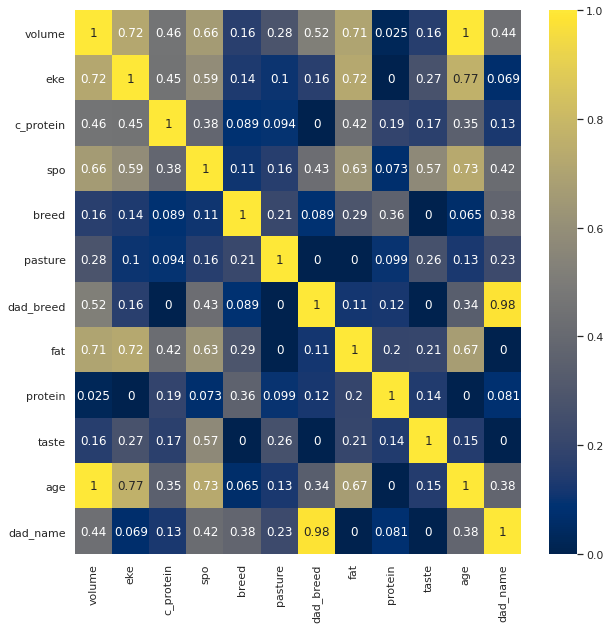

In [78]:
continuous_columns = ['volume', 'eke', 'c_protein', 'spo', 'fat', 'protein']
phik_matrix = df_ferma_corr.phik_matrix(interval_cols=continuous_columns)


#выведем еще раз матрицу и снова изучим ее, на предмет корреляции с параметром taste
sns.heatmap(phik_matrix, annot=True, cmap='cividis')
sns.set(rc={"figure.figsize": (10, 10)})

из представленных параметров больше всего на вкус влияет СПО, ЭКЕ, жирность и тип пастбища.

In [79]:
#приведем столбец со значениями SPO к бинарному типу
df_ferma_corr['spo'] = (df_ferma_corr['spo'] > 0.92).astype(int)
#возведем значения столбца ЭКЕ в квадрат
df_ferma_corr['eke'] = df_ferma_corr['eke']**2

df_ferma_corr

,volume,eke,c_protein,spo,breed,pasture,dad_breed,fat,protein,taste,age,dad_name
0,5863,201.64,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,1,Буйный
1,5529,163.84,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,0,Соловчик
2,5810,196.00,1854,0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,1,Барин
3,5895,153.76,2012,0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,1,Буйный
4,5302,163.84,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,0,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...
617,6812,237.16,1964,1,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,0,1,Буйный
618,5513,166.41,1700,0,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,1,0,Барин
619,5970,207.36,1837,0,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,0,1,Барин
620,5746,190.44,1994,0,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,1,1,Барин


In [80]:
#повторим все действия, которые делали при обучении первой модели

cat_col_names = ['pasture','taste']
num_col_names = ['spo','fat','eke']

#закодируем все категориальные переменные которые у нас встречаются (dad_breed и age)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# выполним преобразование категориальных признаков в тестовой выборке
df_ferma_corr_ohe = encoder.fit_transform(df_ferma_corr[cat_col_names])

# получаем от кодировщика список новых столбцов 
encoder_col_names = encoder.get_feature_names_out()

# создаём тренировочный и тестовый датафреймы из закодированных данных

df_ferma_corr_ohe = pd.DataFrame(df_ferma_corr_ohe, columns=encoder_col_names)

#выведем новую тренировочную закодированную выборку чтобы посмотреть как теперь выглядят столбцы dad_breed и age
df_ferma_corr_ohe

,pasture_Холмистое,taste_1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
617,0.0,0.0
618,0.0,1.0
619,1.0,0.0
620,0.0,1.0


In [81]:
# выполним преобразование количественных признаков в тестовой выборке
df_ferma_corr_scaled = scaler.fit_transform(df_ferma_corr[num_col_names])

df_ferma_corr_scaled = pd.DataFrame(df_ferma_corr_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

df_ferma_corr_scaled= pd.concat([df_ferma_corr_ohe, df_ferma_corr_scaled], axis=1)
df_ferma_corr_scaled

,pasture_Холмистое,taste_1,spo,fat,eke
0,0.0,1.0,-1.211715,-0.190284,-0.326797
1,0.0,1.0,-1.211715,-0.443454,-1.342516
2,1.0,0.0,-1.211715,-0.126992,-0.478348
3,1.0,0.0,-1.211715,-1.329547,-1.613375
4,0.0,1.0,-1.211715,0.759102,-1.342516
...,...,...,...,...,...
617,0.0,0.0,0.825276,0.822394,0.627657
618,0.0,1.0,-1.211715,0.189470,-1.273458
619,1.0,0.0,-1.211715,0.189470,-0.173095
620,0.0,1.0,-1.211715,0.189470,-0.627751


In [82]:
#входные признаки
X = df_ferma_corr_scaled[['pasture_Холмистое', 'spo','fat', 'eke']]
#целевой признак
y = df_ferma_corr_scaled['taste_1']

#разделение на тренировочную и тестовые выборки
X_train, X_test, y_train, y_test5 = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)


Мы подготовили данные, стандартизировали и обработали переменные. Теперь на основе этого датафрейма мы можем обучить модель для предсказания вкуса молока.


In [83]:

# создаём объект для работы с моделью
clf = LogisticRegression()

# настраиваем модель на данные
clf = clf.fit(X_train, y_train)

# получаем прогнозные значения
y_pred = clf.predict(X_test) 

# выводим веса коэффициентов
for feature_number, feature_name in enumerate(X.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")

pasture_Холмистое   : +1.73
spo                 : +0.76
fat                 : +1.09
eke                 : +1.81


Мы обучили модель логистической регрессии и вывелии веса коэффициентов, которые влияют на вкус. Для того чтобы оценить качество полученной модели рассчитаем 3 метрики: accuracy, recall, precision.

In [84]:
#расчет метрики accuracy
acc = accuracy_score(y_test5, y_pred)
recall = recall_score(y_test5, y_pred)
precision = precision_score(y_test5, y_pred)

print('accuracy:',round(acc,3))
print('precision:',round(precision,3))
print('recall',round(recall,3))


accuracy: 0.635
precision: 0.672
recall 0.828


Мы получили значения всех трех метрик для нашей модели и можем сделать выводы: 
* по метрике accuracy можно сказать что в 63.5% случаев модель дала верное предсказание.
* по метрике precision - в только в 67% молоко, которое было отмечено как вкусное, действительно являлось вкусным.
* по метрике recall видно что 83% вкусного молока было определено верно.

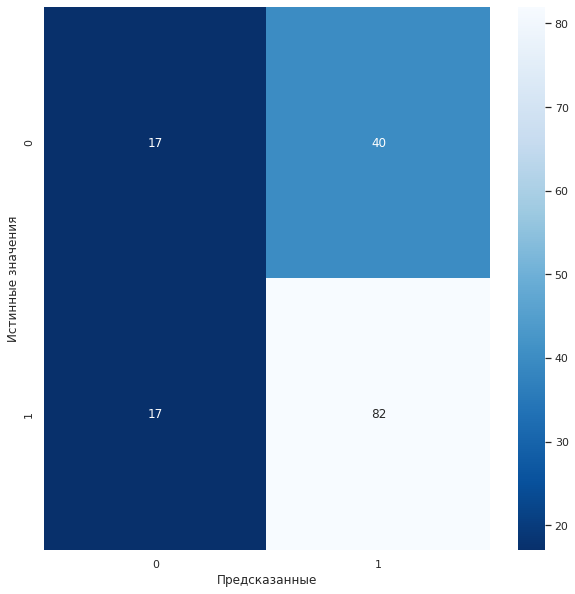

In [85]:
cm = confusion_matrix(y_test5, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные'); 

По данной матрице ошибок, можно сделать вывод, что модель достаточно хорошо предсказывает вкусное молоко, а вот с невкусным у него проблемы. У модели больше ошибок 2 рода, чем 1, а это значит что модель скорее всего предскажет невкусное молоко как вкусное. Это критично в нашей ситуации, так как нам требуется как можно точнее отобрать только вкусное молоко. Это значит, что надо будет увеличивать порог, при котором молоко определяется как вкусное, чтобы избежать ошибок 2 рода(привести их количество к минимуму).<br/><br/>
Следовательно, исходя из всего вышесказанного нам важнее метрика **precision**, потому что она показывает сколько из "вкусного" молока действительно оказалось вкусным.


Будем сводить ошибку 1 рода к нулю. Для этого выведем показатели при разных порогах 

In [86]:
len(y_test5)

156

In [87]:
#сортировка предсказанных значений и вывод самых точных
y_proba = clf.predict_proba(X_test)[:,1]

# Устанавливаем пороги от 0.1 до 1.0, разбив их на 12 равных частей
thresholds = np.linspace(0.1, 1.0, num=50, endpoint=True)

# Список для хранения метрик precision для каждого порога
precision_values = []

# Проходимся по каждому порогу и вычисляем precision
for threshold in thresholds:
    # Создаем бинарные предсказания по текущему порогу
    y_pred = (y_proba >= threshold).astype(int)
    
    # Вычисляем precision для текущего порога
    precision = precision_score(y_test5, y_pred)
    
    # Добавляем значение precision в список
    precision_values.append((threshold, precision))

# Создаем DataFrame из результатов
precision_df = pd.DataFrame(precision_values, columns=['Порог', 'Precision'])

# Выводим DataFrame с порогами и их соответствующими метриками precision
precision_df

,Порог,Precision
0,0.100000,0.634615
1,0.118367,0.634615
2,0.136735,0.634615
3,0.155102,0.634615
4,0.173469,0.634615
5,0.191837,0.634615
6,0.210204,0.634615
7,0.228571,0.634615
8,0.246939,0.634615
9,0.265306,0.634615


Итак, мы вывели список всех порогов и показателей precision при них. Теперь предлагаю взять тот, на котором значение precision впервые обращается в 1 - 0.78.

Precision at threshold 0.78: 1.00
0.18181818181818182


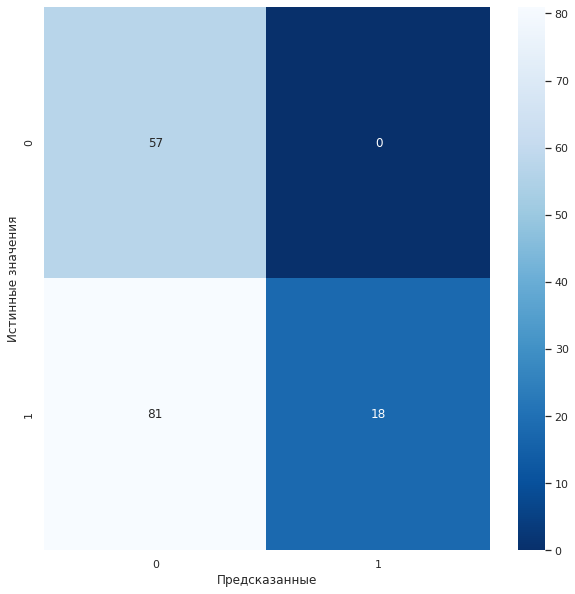

In [88]:
# Допустим, у вас есть оптимальный порог
optimal_threshold = 0.78

# Создаем бинарные предсказания с оптимальным порогом
y_pred = (y_proba >= optimal_threshold).astype(int)

# Используйте y_pred для оценки модели или предсказания
# Например, рассчитайте метрику precision:

precision = precision_score(y_test5, y_pred)
print(f'Precision at threshold {optimal_threshold}: {precision:.2f}')
recall = recall_score(y_test5, y_pred)
print(recall)
cm = confusion_matrix(y_test5, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные'); 

Мы подобрали порог, при котором количество совершаемых моделью ошибок 1 рода стало равным 0, и это порог 0.78. При таком значении переменная presicion стала равна 1, но вот переменная recall стала равна 0.18. Это говорит о плохом качестве модели на умение предсказывать, но зато она точно не определит невкусное молоко, как вкусное, а это нам важнее всего.

Что делать дальше? Улучшать модель для того чтобы она точнее определяла вкусное молоко, чтобы при высоком показателе prrecision был и высокий показатель recall. Это можно сделать, добавив релевантных переменных в обучающую и тестовую выборки.

### С помощью нашей обученной модели спрогнозируем вкус молока.
Для начала обработаем датасет с коровами на покупку, как мы это делали с тестовой выборкой. 

In [89]:
df_cow_buy = df_cow_buy.rename(columns={'mean_spo': 'spo','cur_fat':'fat'})
df_cow_buy

,breed,pasture,dad_breed,dad_name,fat,cur_protein,age,eke,mean_c_protein,spo,volume
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.292862,2021.280386,0.959222,5563.823401
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.292862,2021.280386,0.959222,5358.583128
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.292862,2021.280386,0.959222,5351.376524
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,1,15.292862,2021.280386,0.959222,5548.665742
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,1,15.292862,2021.280386,0.959222,5587.098711
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,0,15.292862,2021.280386,0.959222,5359.328423
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.292862,2021.280386,0.959222,5563.823401
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,1,15.292862,2021.280386,0.959222,5573.287786
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.292862,2021.280386,0.959222,5351.376524
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,0,15.292862,2021.280386,0.959222,5338.765206


In [90]:
#повторим все действия, которые делали при обучении первой модели

cat_col_names = ['pasture']
num_col_names = ['spo', 'fat','eke']

#закодируем все категориальные переменные которые у нас встречаются (dad_breed и age)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop='first')

# выполним преобразование категориальных признаков в тестовой выборке
df_cow_buy_ohe = encoder.fit_transform(df_cow_buy[cat_col_names])

# получаем от кодировщика список новых столбцов 
encoder_col_names = encoder.get_feature_names_out()

# создаём тренировочный и тестовый датафреймы из закодированных данных

df_cow_buy_ohe = pd.DataFrame(df_cow_buy_ohe, columns=encoder_col_names)

#выведем новую тренировочную закодированную выборку чтобы посмотреть как теперь выглядят столбцы dad_breed и age
df_cow_buy_ohe

,pasture_Холмистое
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
5,0.0
6,1.0
7,0.0
8,0.0
9,1.0


In [91]:
# выполним преобразование количественных признаков в тестовой выборке
df_cow_buy_scaled = scaler.transform(df_cow_buy[num_col_names])

df_cow_buy_scaled = pd.DataFrame(df_cow_buy_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

df_cow_buy_scaled= pd.concat([df_cow_buy_ohe, df_cow_buy_scaled], axis=1)
df_cow_buy_scaled

,pasture_Холмистое,spo,fat,eke
0,1.0,0.742212,-0.190284,-5.334109
1,0.0,0.742212,-0.443454,-5.334109
2,0.0,0.742212,-0.126992,-5.334109
3,1.0,0.742212,-1.329547,-5.334109
4,0.0,0.742212,0.189470,-5.334109
5,0.0,0.742212,0.126178,-5.334109
6,1.0,0.742212,-0.190284,-5.334109
7,0.0,0.742212,-0.253577,-5.334109
8,0.0,0.742212,-0.126992,-5.334109
9,1.0,0.742212,-1.329547,-5.334109


In [92]:
# Получите имена признаков, использовавшихся при обучении модели
feature_names_trained = clf.feature_names_in_

# Получите имена признаков из новых данных
feature_names_new = df_cow_buy_scaled.columns.tolist()

print(feature_names_trained)
feature_names_new

['pasture_Холмистое' 'spo' 'fat' 'eke']


['pasture_Холмистое', 'spo', 'fat', 'eke']

In [93]:
probabilities = clf.predict(df_cow_buy_scaled) 
probabilities

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [94]:
df_cow_buy['taste'] = probabilities
df_cow_buy

,breed,pasture,dad_breed,dad_name,fat,cur_protein,age,eke,mean_c_protein,spo,volume,taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.292862,2021.280386,0.959222,5563.823401,0.0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.292862,2021.280386,0.959222,5358.583128,0.0
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.292862,2021.280386,0.959222,5351.376524,0.0
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,1,15.292862,2021.280386,0.959222,5548.665742,0.0
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,1,15.292862,2021.280386,0.959222,5587.098711,0.0
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,0,15.292862,2021.280386,0.959222,5359.328423,0.0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.292862,2021.280386,0.959222,5563.823401,0.0
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,1,15.292862,2021.280386,0.959222,5573.287786,0.0
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.292862,2021.280386,0.959222,5351.376524,0.0
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,0,15.292862,2021.280386,0.959222,5338.765206,0.0


Стоит обратить внимание, что такие данные дала модель, которая имела порог в 0.5. А мы выяснили что точно не ошибется модель, с порогом 0.8. Посмотрим, какие предсказания даст нам она. 

In [95]:
# Предсказание вероятностей для новых данных
probabilities = clf.predict_proba(df_cow_buy_scaled)

# Извлекаем вероятности положительного класса
positive_class_probabilities = probabilities[:, 1]

# Используем оптимальный порог для классификации
optimal_threshold = 0.78
y_pred_new = (positive_class_probabilities >= optimal_threshold).astype(int)

# Вывод результатов
print(y_pred_new)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Новая модель, к сожалению дала такой прогноз, что ни у одной из коров не будет вкусное молоко. Конечно, она может ошибаться, это не значит что молоко в действительности не будет вкусным, мы же исключили только ошибки 1 рода, не 2.

## Итоговые выводы

Мы получили датафрейм с данными о коровах, которые собирается покупать фермер, который включает в себя новые столбцы: информацию об Удое и вкусе молока. Посмотрим его.

In [96]:
df_cow_buy

,breed,pasture,dad_breed,dad_name,fat,cur_protein,age,eke,mean_c_protein,spo,volume,taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.292862,2021.280386,0.959222,5563.823401,0.0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.292862,2021.280386,0.959222,5358.583128,0.0
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.292862,2021.280386,0.959222,5351.376524,0.0
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,1,15.292862,2021.280386,0.959222,5548.665742,0.0
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,1,15.292862,2021.280386,0.959222,5587.098711,0.0
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,0,15.292862,2021.280386,0.959222,5359.328423,0.0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.292862,2021.280386,0.959222,5563.823401,0.0
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,1,15.292862,2021.280386,0.959222,5573.287786,0.0
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.292862,2021.280386,0.959222,5351.376524,0.0
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,0,15.292862,2021.280386,0.959222,5338.765206,0.0


Отберем коров, для которых спрогнозирован удой больше 6000кг в год и вкусное молоко

In [97]:
df_cow_buy.query(('volume > 6000') and ('taste == 1'))

,breed,pasture,dad_breed,dad_name,fat,cur_protein,age,eke,mean_c_protein,spo,volume,taste


Вот данные о коровах, которые удовлетворяют требованиям. Таких коров у нас не оказалось

**Выводы для фермера:** 
Чтобы 100% не попасть на корову с невкусным молоком придется не покупать ни одну корову, так как модель работающая без ложноположительного показателя не предсказала вкусное молоко ни у одной из коров. <br/>
Для более точного прогноза хорошо было бы узнать реальные значения СПО, сырого протеина и ЭКЕ у тех коров, которых он собирается покупать. Мы не можем точно опираться на данные модели, так как недостающие значения были заполнены примерными(средними), в действительности дела могут обстоять иначе. <br/><br/>
**Выводы по моделям линейной регрессии и логистической регрессии:** в данной задаче мы столкнулись с необходимостью улучшить предсказания модели лиейной регрессии, и добились мы этого путем приведения вводных параметров до линейной зависимости с целевым. Мы преобразовывали данные, что-то пришлось возвести в квадрат(при квадратичной зависимости), что-то пришлось привести в бинарный тип данных. Этим самым мы добились улучшения качества предсказаний модели. <br/>
Думаю улучшить модель было бы еще можно, так как метрика r2, с помощью которой мы оценивали качество в последнем случае равнялась 0.82. А как нам известно, ее максимальное значние - 1. Значит, в теории можно добавить данных, перепроверить связи вводных параметров еще раз, довести их до линейной зависимости с целевым признаком, и в таком случае показатель метрики будет улучшаться, и как следствие улучшаться качество предсказаний. <br/>
В задачах классификации применяются модели логистической регрессии, качество которых оценивается метриками accuracy, precision и  recall.<br/>
* по метрике accuracy можно сказать что в cкольких % случаев модель дала верное предсказание.
* по метрике precision - во скольких процентах случаев то что было предсказано как истинное, действительно окажется истинным
* по метрике recall будет видно, сколько процентов истинных значений были определены как истинные.

По моему мнению основной метрикой, которая будет важна в бизнесе является precision, так как она помогает избежать ошибок 2 рода, а то есть случаи, когда при наличии проблемы модель говорит что никакой проблемы на самом деле нет. Увеличение показателя этой метрики повысит процент верных решений. <br/>
Так же метрика recall, поможет определить сколько истинных значений из всех существующих было обнаружено. Звучит довольно полезно. Accuracy же, как будто несет в себе маловато полезной информации, которая может что-то рассказать о модели.